# ANÁLISES GRID DE BEST ESTIMATOR

Mejores algoritmos propuestos por LazyPredict:

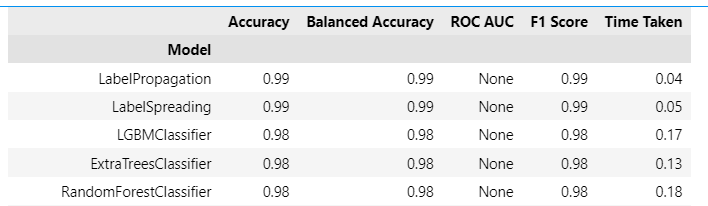

## IMPORTACIÓN DE PAQUETES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#Modelos

from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Optimizar modelo
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

import scikitplot as skplt
from yellowbrick.classifier import discrimination_threshold

#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle


## IMPORTACIÓN DE DATOS

### Cargar los datos

In [2]:
df_tablon = pd.read_pickle('../../02_Datos/03_Trabajo/tablon_analitico.pickle')
df_tablon.head()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-63,-60,-60,-67,-76,-85,-84,1
2,-61,-60,-68,-62,-77,-90,-80,1
3,-63,-65,-60,-63,-77,-81,-87,1
4,-64,-55,-63,-66,-76,-88,-83,1


### Separar predictoras y target

In [3]:
x = df_tablon.drop(columns= 'room').copy()
y = df_tablon.room.copy()

## MODELIZAR

### RESERVAR EL DATASET DE VALIDACION

In [4]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state=1)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES

In [5]:
pipe = Pipeline([('algoritmo', XGBClassifier())])

grid = [

        {
            'algoritmo' : [LabelPropagation()]
        },

        {
            'algoritmo' : [LabelSpreading()]
        },       

        {
            'algoritmo' : [LGBMClassifier()]
        },

        {
            'algoritmo' : [ExtraTreesClassifier()]
        },

        {
            'algoritmo' : [RandomForestClassifier()]
        },

        {
            'algoritmo' : [XGBClassifier()]
        }
]

### OPTIMIZAR LOS HIPERPARÁMETROS

In [6]:
grid_search = GridSearchCV(estimator= pipe,
                           param_grid= grid,
                           cv=3,
                           scoring= 'accuracy',
                           verbose=0,
                           n_jobs= -1)

modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\core.py", line 620, in inner_f
    return 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.262120,0.001646,0.025172,0.001666,ExtraTreesClassifier(),{'algoritmo': ExtraTreesClassifier()},0.987768,0.972477,0.984663,0.981636,0.006599,1
4,0.291756,0.008554,0.021244,0.003741,RandomForestClassifier(),{'algoritmo': RandomForestClassifier()},0.984709,0.969419,0.978528,0.977552,0.006280,2
2,0.774874,0.075781,0.011252,0.003442,LGBMClassifier(),{'algoritmo': LGBMClassifier()},0.993884,0.954128,0.969325,0.972446,0.016379,3
0,0.067065,0.009601,0.034946,0.009788,LabelPropagation(),{'algoritmo': LabelPropagation()},0.819572,0.770642,0.794479,0.794898,0.019978,4
1,0.069269,0.004765,0.028815,0.003622,LabelSpreading(),{'algoritmo': LabelSpreading()},0.819572,0.770642,0.794479,0.794898,0.019978,4
5,0.005002,0.003560,0.000000,0.000000,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo': XGBClassifier(base_score=None, b...",NaN,NaN,NaN,NaN,NaN,6


In [7]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo', ExtraTreesClassifier())])

In [8]:
modelo.best_params_

{'algoritmo': ExtraTreesClassifier()}

In [9]:
modelo.best_score_

0.9816357416683865

### GUARDAR MODELO.BEST_ESTIMATOR Y PARÁMETROS

In [10]:
modelo_best_estimator = modelo

#### Guardamos modelo, parámetros y score

In [11]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### PREDECIR Y EVALUAR SOBRE EL TRAIN

### Predecir sobre Train

In [12]:
pred = modelo.best_estimator_.predict(train_x)

### Evaluar sobre el Train

In [13]:
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00       243
           4       1.00      1.00      1.00       255

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

#### Predecir sobre la validación

In [14]:
pred = modelo.best_estimator_.predict(val_x)

Evaluar sobre la validación

In [15]:
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:\n{v_report}")

Accuracy: 0.9809523809523809
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       110
           2       0.98      0.96      0.97        95
           3       0.95      0.97      0.96       107
           4       1.00      1.00      1.00       108

    accuracy                           0.98       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.98      0.98      0.98       420



#### Gráfico entre la diferencia entre la validación y el original

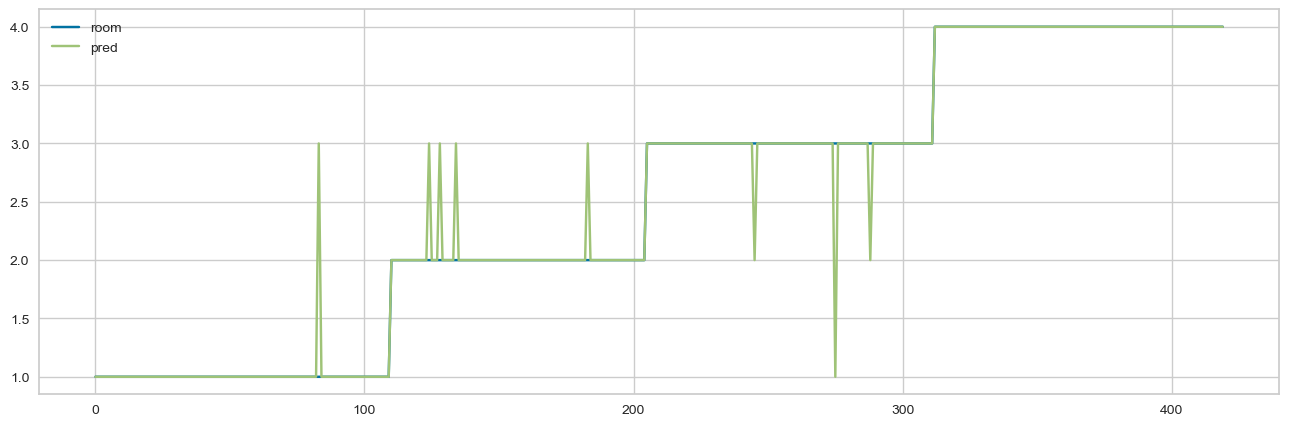

In [16]:
test_y = val_y.reset_index().copy()
test_pred = pd.Series(pred).to_frame()
df_pred = pd.concat([test_y,test_pred], axis= 1).sort_values(by='room').reset_index()
df_pred.rename(columns = {0:'pred'}, inplace = True)
df_pred = df_pred.drop(columns= ['level_0'])
df_pred[['room','pred']].plot(figsize=(16,5));

## REPORTING DEL MODELO

Matrix de Confusión MultiClass

Text(0.5, 1.0, 'Confusion Matrix')

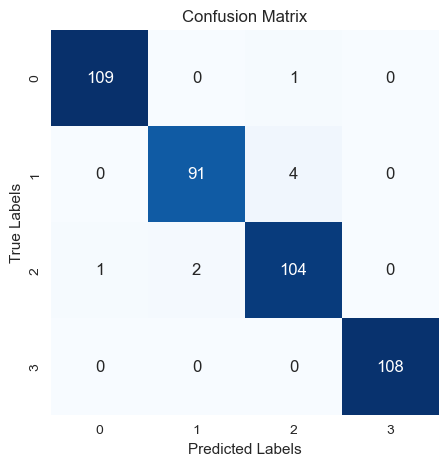

In [17]:
# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")


In [29]:
n_classes = len(np.unique(val_y))
n_classes

4

ROC CHART MULTICLASS

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


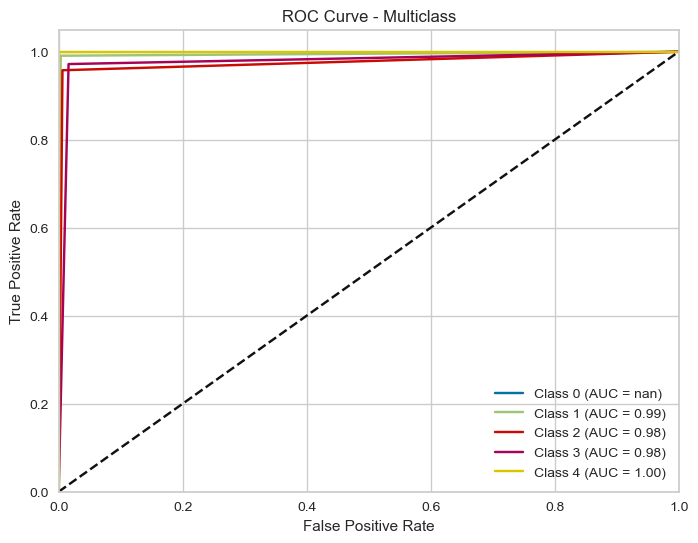

In [33]:
# Binarizar las etiquetas verdaderas y las predicciones para cada clase
n_classes = len(np.unique(val_y))+1
binarized_val_y = label_binarize(val_y, classes=np.arange(n_classes))
binarized_pred = label_binarize(pred, classes=np.arange(n_classes))

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_val_y[:, i], binarized_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotear el gráfico ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Configurar etiquetas y título del gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc="lower right");

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [19]:
version_estimator = '_v01'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'ExtraTreesClassifier_v01.pickle'

In [20]:
m_best_estimator

'ExtraTreesClassifier'

In [21]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [22]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Modelo Base"
x_columns = list(x.columns)
y_target = y.name


In [23]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                 ExtraTreesClassifier
m_Best_paramans                 {'algoritmo': ExtraTreesClassifier()}
m_Best_Score                                       0.9816357416683865
t_accuracy                                                        1.0
t_report                          precision    recall  f1-score   ...
v_accuracy                                                   0.980952
v_report                          precision    recall  f1-score   ...
comentarios                                               Modelo Base
predictoras_X       [wifi1, wifi2, wifi3, wifi4, wifi5, wifi6, wifi7]
target_y                                                         room
Name: ExtraTreesClassifier_v01.pickle, dtype: object

In [24]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [25]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')